# Exercise 6 - Polynomial Regression

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

### Generating target values for the dataset D1

In [9]:
def generate_target(x):
    y = []
    ## Creating random additive values
    additive = np.random.uniform(0,0.5,(100,1))
    for i in range (0,len(x)):
        ##Generating the target values
        y.append(1.3*pow(x[i],2) + 4.8*x[i] + 8 + additive[i])
    return y

### Find start and stop for uniform distribution given mean and standard deviation

In [10]:
def uniform_values(mean,sd):
    ##To find the end of the range
    end = np.sqrt(12) * sd / 2 + mean
    ## To find the start of the range
    start = 2 * mean - end
    return start,end

### Creating Dataset D1

In [11]:
def create_dataset(start,end):
    ##Create the input values for D1
    D1_x = np.random.uniform(start,end,(100,1))
    D1_x = sorted(D1_x)

    D1_y = generate_target(D1_x)
    return D1_x,D1_y

### Creating degrees of polynomial feature for data

In [12]:
def create_poly(D1_x,degree):
    poly = {}
    for i in degree:
        #Generating Polynomial feature for the data with given degrees
        poly[i] = PolynomialFeatures(i,include_bias =False).fit_transform(D1_x)
    return poly

###  Task A: Prediction with high degree of polynomials

In [13]:
start,end = uniform_values(1,0.05)
D1_x,D1_y = create_dataset(start,end)
degree = [1,2,7,10,16,100]
Y_pred = []
RMSE = []
poly_D1_x = create_poly(D1_x,degree)##A dict of polynomial feature for data
for ind,i in enumerate(degree):
    ## Linear Regression model
    linreg = linear_model.LinearRegression()
    linreg.fit(poly_D1_x[i],D1_y)##Fit linear regression model
    Y_pred.append(linreg.predict(poly_D1_x[i]))
    RMSE.append(np.sqrt(mean_squared_error(D1_y,Y_pred[ind])))

In [12]:
print("D1_X:",D1_x[0:10])
print("\nD1_Y:",D1_y[0:10])

D1_X: [array([0.91369959]), array([0.9182404]), array([0.91894628]), array([0.9193962]), array([0.92031634]), array([0.92096441]), array([0.92610762]), array([0.92698167]), array([0.92707757]), array([0.92924431])]

D1_Y: [array([13.96785952]), array([13.67669382]), array([13.89079244]), array([13.81184302]), array([13.89629011]), array([13.94565833]), array([14.02395875]), array([13.88879677]), array([13.9949125]), array([13.85269043])]


In [13]:
print("Start:",start,"End:",end)

Start: 0.9133974596215562 End: 1.0866025403784438


In [22]:
print("Degree 1:",poly_D1_x[1][0],"\nDegree 2:",poly_D1_x[2][0],"\nDegree 7:",poly_D1_x[7][0],"\nDegree 10:",poly_D1_x[10][0],"\nDegree 16:",poly_D1_x[16][0],"\nDegree 100:",poly_D1_x[100][0])

Degree 1: [0.91369959] 
Degree 2: [0.91369959 0.83484694] 
Degree 7: [0.91369959 0.83484694 0.76279931 0.69696941 0.63682067 0.58186278
 0.53164779] 
Degree 10: [0.91369959 0.83484694 0.76279931 0.69696941 0.63682067 0.58186278
 0.53164779 0.48576636 0.44384453 0.40554056] 
Degree 16: [0.91369959 0.83484694 0.76279931 0.69696941 0.63682067 0.58186278
 0.53164779 0.48576636 0.44384453 0.40554056 0.37054225 0.3385643
 0.30934606 0.28264937 0.25825661 0.23596896] 
Degree 100: [9.13699590e-01 8.34846941e-01 7.62799307e-01 6.96969414e-01
 6.36820668e-01 5.81862783e-01 5.31647786e-01 4.85766364e-01
 4.43844528e-01 4.05540563e-01 3.70542246e-01 3.38564298e-01
 3.09346061e-01 2.82649369e-01 2.58256612e-01 2.35968961e-01
 2.15604743e-01 1.96997965e-01 1.79996960e-01 1.64463148e-01
 1.50269911e-01 1.37301556e-01 1.25452376e-01 1.14625784e-01
 1.04733532e-01 9.56949852e-02 8.74364687e-02 7.98906656e-02
 7.29960684e-02 6.66964777e-02 6.09405444e-02 5.56813504e-02
 5.08760270e-02 4.64854050e-02 4.2

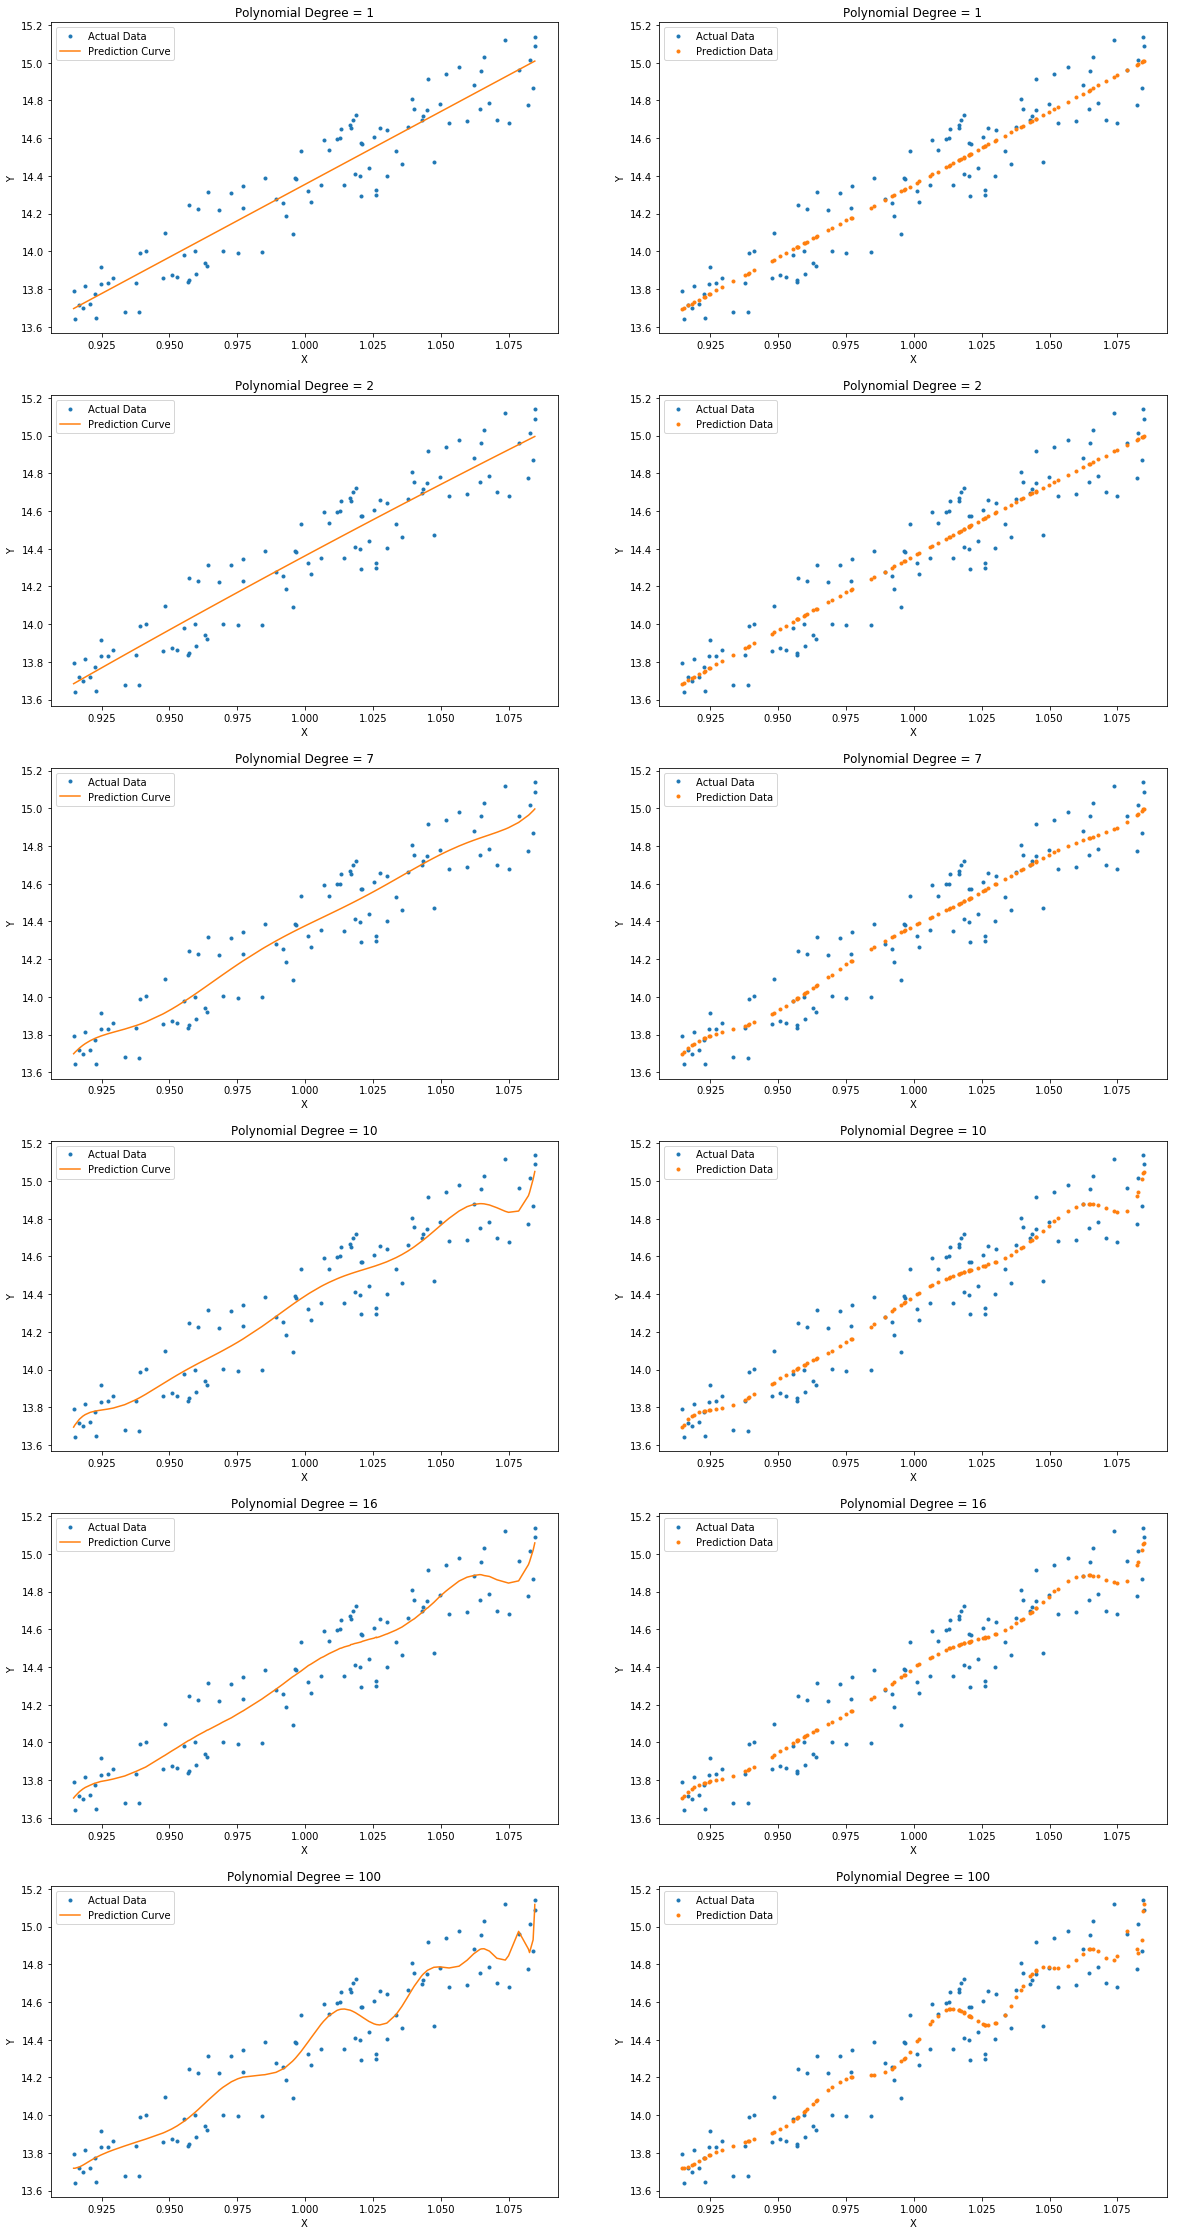

In [258]:
fig, ax = plt.subplots(6, 2, figsize=(20, 40))
axis = 0
for i in range(0,len(Y_pred)):
    ax[axis][0].plot(D1_x,D1_y,'.',label = "Actual Data")
    ax[axis][0].plot(D1_x,Y_pred[i],label = "Prediction Curve")
    ax[axis][0].set_xlabel("X")
    ax[axis][0].set_title("Polynomial Degree = " + str(degree[i]))
    ax[axis][0].set_ylabel("Y")
    ax[axis][0].legend()
    ax[axis][1].plot(D1_x,D1_y,'.',label = "Actual Data")
    ax[axis][1].plot(D1_x,Y_pred[i],'.',label = "Prediction Data")
    ax[axis][1].set_title("Polynomial Degree = " + str(degree[i]))
    ax[axis][1].set_xlabel("X")
    ax[axis][1].set_ylabel("Y")
    ax[axis][1].legend()
    axis+=1


RMSE for Polynomal degree 1: 0.13798
RMSE for Polynomal degree 2: 0.13783
RMSE for Polynomal degree 7: 0.13651
RMSE for Polynomal degree 10: 0.13451
RMSE for Polynomal degree 16: 0.13432
RMSE for Polynomal degree 100: 0.12748


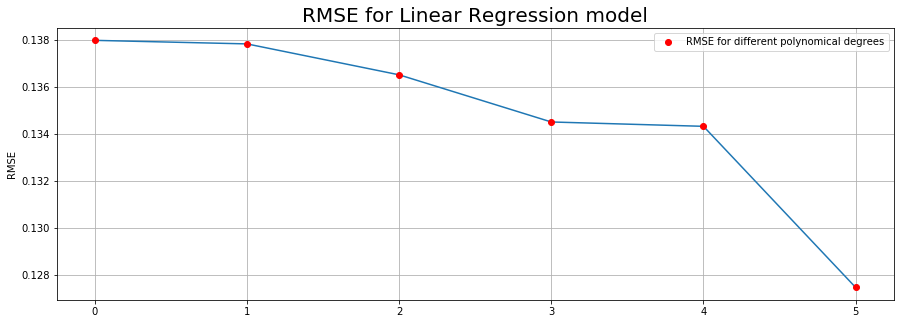

In [266]:
for i in range(0,len(RMSE)):
    print("RMSE for Polynomal degree "+str(degree[i])+": " + str(round(RMSE[i],5)))
plt.figure(figsize=(15,5))
plt.title("RMSE for Linear Regression model",fontsize=20)
plt.plot(RMSE)
plt.plot(RMSE,'ro',label ="RMSE for different polynomical degrees")
plt.ylabel("RMSE")
plt.grid()
plt.legend()
plt.show()

### Task B: Effect of Regularization

In [23]:
ridge_alpha = [0,10e-6,10e-2,1]
Y_pred_ridge = []
RMSE_ridge = []
for ind,i in enumerate(ridge_alpha):
    ridreg = linear_model.Ridge(alpha = i)##Initialize Ridge regression with custom regularization constant
    ridreg.fit(poly_D1_x[2],D1_y)##Fitting the model
    Y_pred_ridge.append(ridreg.predict(poly_D1_x[2]))
    RMSE_ridge.append(np.sqrt(mean_squared_error(D1_y,Y_pred_ridge[ind])))

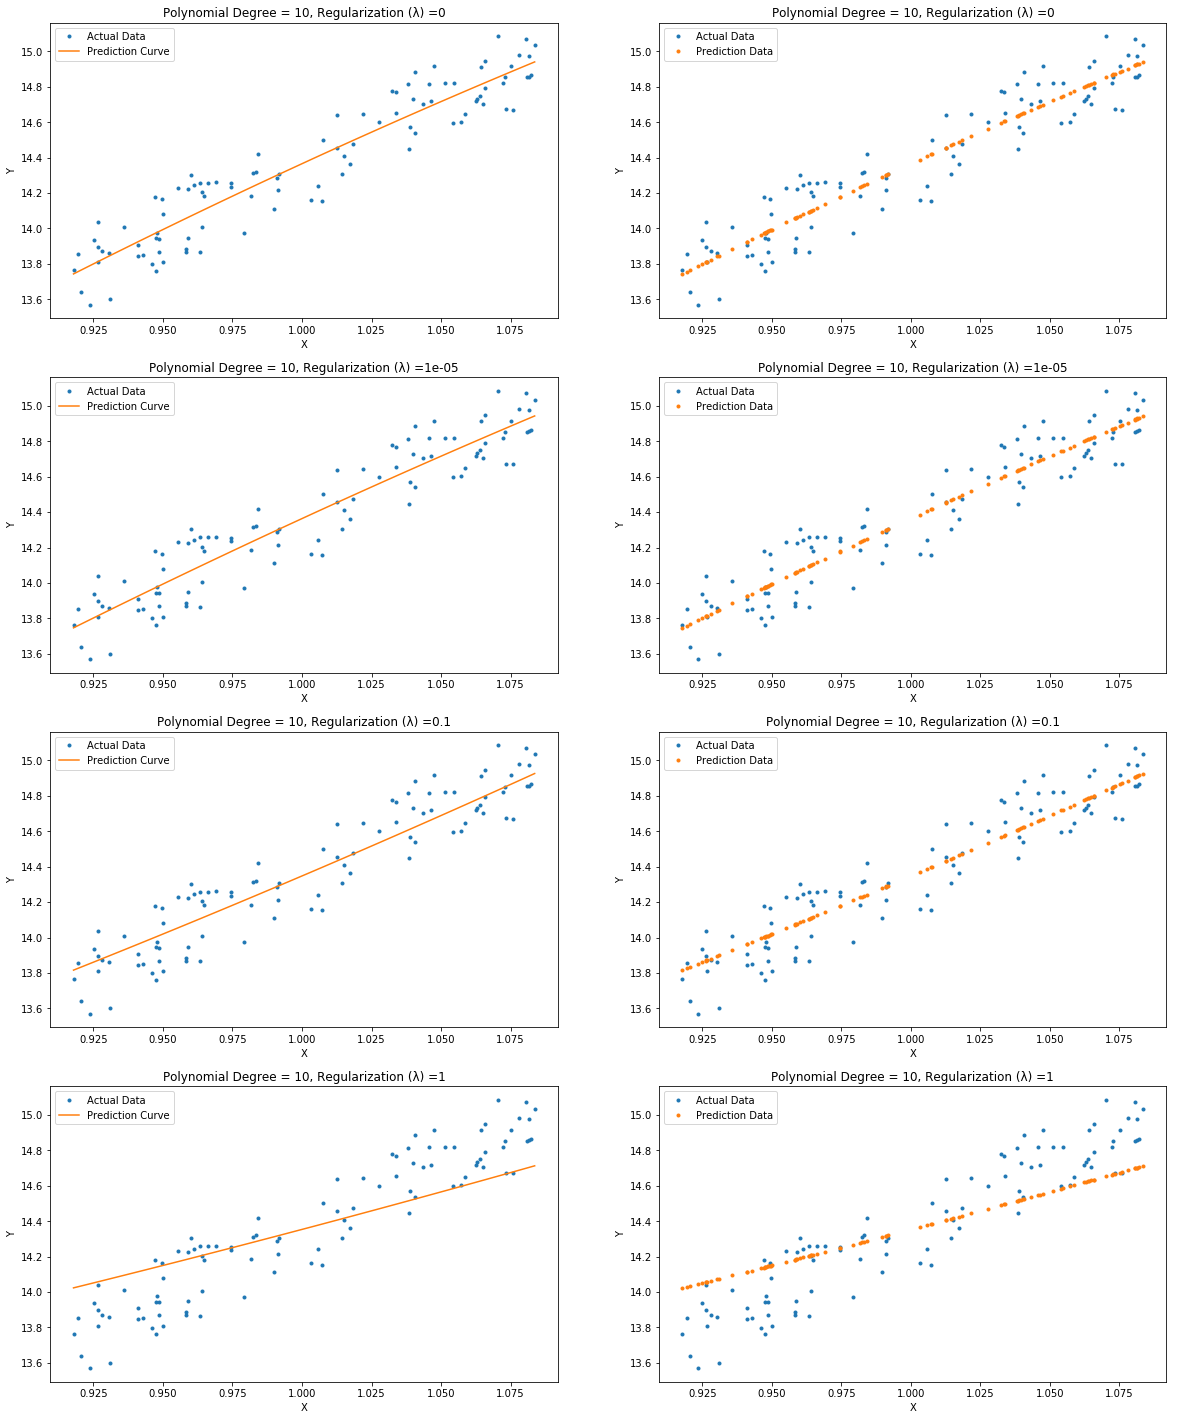

In [24]:
fig, ax = plt.subplots(4, 2, figsize=(20, 25))
axis = 0
for i in range(0,len(Y_pred_ridge)):
    ax[axis][0].plot(D1_x,D1_y,'.',label = "Actual Data")
    ax[axis][0].plot(D1_x,Y_pred_ridge[i],label = "Prediction Curve")
    ax[axis][0].set_xlabel("X")
    ax[axis][0].set_title("Polynomial Degree = 10, Regularization (λ) =" + str(ridge_alpha[i]))
    ax[axis][0].set_ylabel("Y")
    ax[axis][0].legend()
    ax[axis][1].plot(D1_x,D1_y,'.',label = "Actual Data")
    ax[axis][1].plot(D1_x,Y_pred_ridge[i],'.',label = "Prediction Data")
    ax[axis][1].set_title("Polynomial Degree = 10, Regularization (λ) =" + str(ridge_alpha[i]))
    ax[axis][1].set_xlabel("X")
    ax[axis][1].set_ylabel("Y")
    ax[axis][1].legend()
    axis+=1


RMSE for Regularization (λ:0) = 0.12835
RMSE for Regularization (λ:1e-05) = 0.13461
RMSE for Regularization (λ:0.1) = 0.13647
RMSE for Regularization (λ:1) = 0.14413


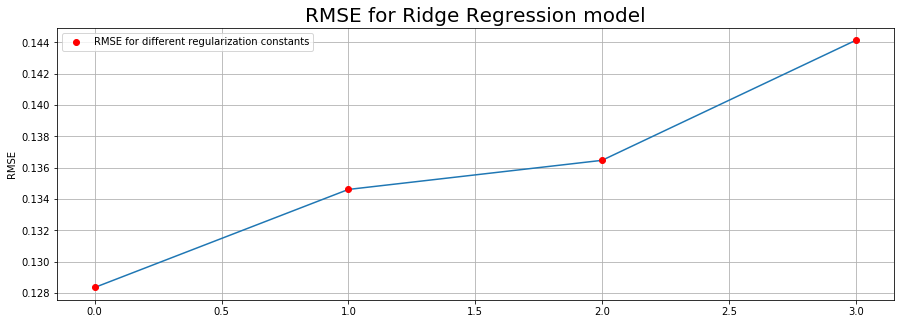

In [22]:
for i in range(0,len(RMSE_ridge)):
    print("RMSE for Regularization (λ:" + str(ridge_alpha[i])+") = " + str(round(RMSE_ridge[i],5)))
plt.figure(figsize=(15,5))
plt.title("RMSE for Ridge Regression model",fontsize=20)
plt.plot(RMSE_ridge)
plt.plot(RMSE_ridge,'ro',label ="RMSE for different regularization constants")
plt.ylabel("RMSE")
plt.grid()
plt.legend()
plt.show()